# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File 'airline_passengers.csv' already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [4]:
# Check if there are any nan values
df.isna().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

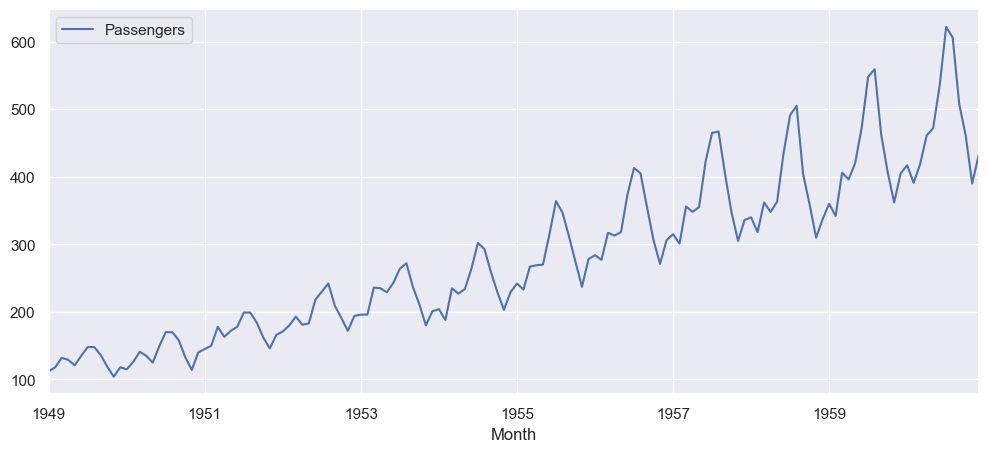

In [5]:
# Plot the data to see the trend
df.plot(figsize=(12, 5))

Can observe both a trend and a cyclcical component.

# Calculate the EWMA

In [6]:
alpha = 0.2
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean() # adjust=False means that we are using the formula for the EWMA
df.plot(figsize=(12, 5))

<Axes: xlabel='Month'>

# Simple Exponenntial Smoothing Forecasting

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
df.head()

Passengers      EWMA
Month                           
1949-01-01         112  112.0000
1949-02-01         118  113.2000
1949-03-01         132  116.9600
1949-04-01         129  119.3680
1949-05-01         121  119.6944

In [9]:
# Create the model and fit it to the data (the data is the passengers column) 
ses = SimpleExpSmoothing(df['Passengers'])

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
